In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('C:\\Users\\norma\\OneDrive - Eotvos Lorand Tudomanyegyetem\\Asztal\\open\\2018Floor3_features_selected.csv')

In [3]:
df.head()

,z1_AC2(kW),z1_AC4(kW),z1_Plug(kW),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_Light(kW),z2_Plug(kW),z2_S1(RH%),z2_S1(lux),...,z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(RH%),z5_S1(lux)
0,0.0,8.74,0.22,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.15,62.86,0.0
1,0.0,8.74,0.23,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.14,62.87,0.0
2,0.0,8.61,0.22,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.14,62.88,0.0
3,0.0,8.81,0.23,62.50,0.0,0.0,0.0,0.15,65.73,0.0,...,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.14,62.88,0.0
4,0.0,8.89,0.22,62.51,0.0,0.0,0.0,0.15,65.73,0.0,...,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.14,62.88,0.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM


In [5]:
features=list(df.columns)

In [6]:
features

['z1_AC2(kW)',
 'z1_AC4(kW)',
 'z1_Plug(kW)',
 'z1_S1(RH%)',
 'z1_S1(lux)',
 'z2_AC1(kW)',
 'z2_Light(kW)',
 'z2_Plug(kW)',
 'z2_S1(RH%)',
 'z2_S1(lux)',
 'z3_Light(kW)',
 'z3_Plug(kW)',
 'z4_AC1(kW)',
 'z4_Light(kW)',
 'z4_Plug(kW)',
 'z4_S1(RH%)',
 'z4_S1(lux)',
 'z5_AC1(kW)',
 'z5_Light(kW)',
 'z5_Plug(kW)',
 'z5_S1(RH%)',
 'z5_S1(lux)']

In [7]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [8]:
model_ocsvm = OneClassSVM(nu=0.05, kernel='rbf', gamma='scale')  
model_ocsvm.fit(df_scaled)

# Anomaly prediction (-1 = anomaly, 1 = normal data)
predictions = model_ocsvm.predict(df_scaled)

# Adding anomaly to dataframe
df['abnormal_ocsvm'] = (predictions == -1).astype(int)

In [9]:
print(df.head())

   z1_AC2(kW)  z1_AC4(kW)  z1_Plug(kW)  z1_S1(RH%)  z1_S1(lux)  z2_AC1(kW)  \
0         0.0        8.74         0.22       62.50         0.0         0.0   
1         0.0        8.74         0.23       62.50         0.0         0.0   
2         0.0        8.61         0.22       62.50         0.0         0.0   
3         0.0        8.81         0.23       62.50         0.0         0.0   
4         0.0        8.89         0.22       62.51         0.0         0.0   

   z2_Light(kW)  z2_Plug(kW)  z2_S1(RH%)  z2_S1(lux)  ...  z4_Light(kW)  \
0           0.0         0.15       65.74         0.0  ...           0.0   
1           0.0         0.15       65.74         0.0  ...           0.0   
2           0.0         0.15       65.74         0.0  ...           0.0   
3           0.0         0.15       65.73         0.0  ...           0.0   
4           0.0         0.15       65.73         0.0  ...           0.0   

   z4_Plug(kW)  z4_S1(RH%)  z4_S1(lux)  z5_AC1(kW)  z5_Light(kW)  z5_Plug(kW)  \

In [28]:
num_anomalies = df['abnormal_ocsvm'].sum()

print(f"Number of anomaly: {num_anomalies}")

Number of anomaly: 12732


In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

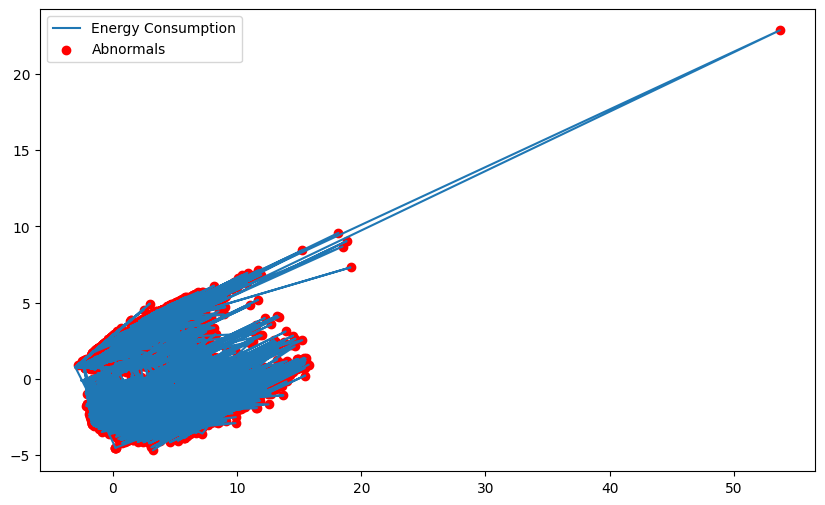

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
plt.plot(df_pca[:,0], df_pca[:,1], label='Energy Consumption')
plt.scatter(df_pca[:,0][df['abnormal_ocsvm'] == 1], df_pca[:,1][df['abnormal_ocsvm'] == 1], color='red', label='Abnormals')
plt.legend()
plt.show()

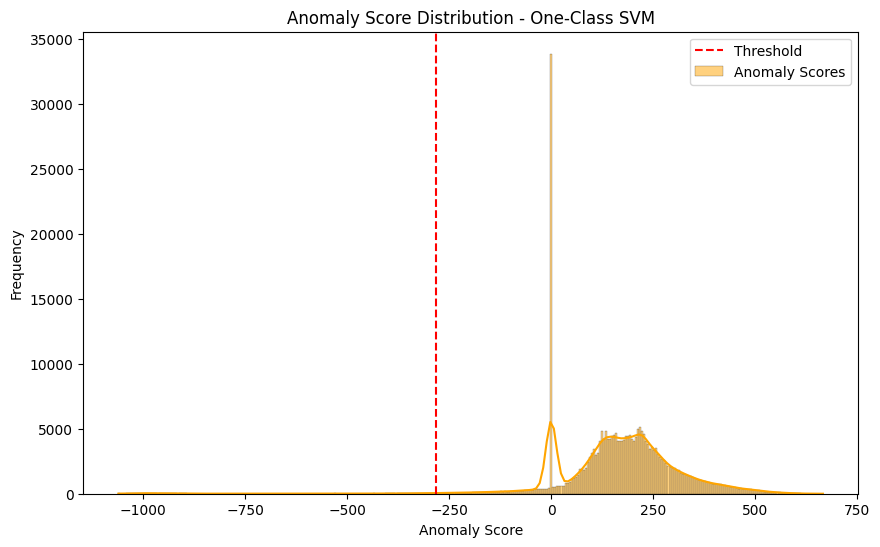

In [20]:
import seaborn as sns
import numpy as np

# Calculate the anomaly scores (decision_function)
anomaly_scores = model_ocsvm.decision_function(df_scaled)

# plot out 
plt.figure(figsize=(10, 6))
sns.histplot(anomaly_scores, kde=True, color='orange', label='Anomaly Scores')
plt.axvline(x=np.percentile(anomaly_scores, 1), color='red', linestyle='--', label='Threshold')
plt.title("Anomaly Score Distribution - One-Class SVM")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [22]:
df

,z1_AC2(kW),z1_AC4(kW),z1_Plug(kW),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_Light(kW),z2_Plug(kW),z2_S1(RH%),z2_S1(lux),...,z4_Light(kW),z4_Plug(kW),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(RH%),z5_S1(lux),abnormal_ocsvm
0,0.0,8.74,0.22,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.07,0.0,0.0,0.0,0.0,0.15,62.86,0.0,0
1,0.0,8.74,0.23,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.07,0.0,0.0,0.0,0.0,0.14,62.87,0.0,0
2,0.0,8.61,0.22,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.08,0.0,0.0,0.0,0.0,0.14,62.88,0.0,0
3,0.0,8.81,0.23,62.50,0.0,0.0,0.0,0.15,65.73,0.0,...,0.0,0.08,0.0,0.0,0.0,0.0,0.14,62.88,0.0,0
4,0.0,8.89,0.22,62.51,0.0,0.0,0.0,0.15,65.73,0.0,...,0.0,0.07,0.0,0.0,0.0,0.0,0.14,62.88,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264955,0.0,0.00,0.27,0.00,0.0,0.0,0.0,0.02,0.00,0.0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.04,0.00,0.0,0
264956,0.0,0.00,0.27,0.00,0.0,0.0,0.0,0.02,0.00,0.0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.04,0.00,0.0,0
264957,0.0,0.00,0.23,0.00,0.0,0.0,0.0,0.02,0.00,0.0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.04,0.00,0.0,0
264958,0.0,0.00,0.30,0.00,0.0,0.0,0.0,0.03,0.00,0.0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.04,0.00,0.0,0


In [23]:
df['Abnormal']=df['abnormal_ocsvm']

In [24]:
df.drop(['abnormal_ocsvm'],axis=1).to_csv('C:\\Users\\norma\\OneDrive - Eotvos Lorand Tudomanyegyetem\\Asztal\\open\\2018Floor3_abnormals_ocsvm.csv',index=False)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Creating Pipeline
pipeline_ocsvm = Pipeline([
    ('scaler', StandardScaler()),  
    ('ocsvm', OneClassSVM(nu=0.05, kernel='rbf', gamma='scale'))  # One-Class SVM model
])

# Apply on scaled data
df['abnormal_ocsvm'] = pipeline_ocsvm.fit_predict(df_scaled)

# Convert to binary values
df['abnormal_ocsvm'] = df['abnormal_ocsvm'].apply(lambda x: 1 if x == -1 else 0)


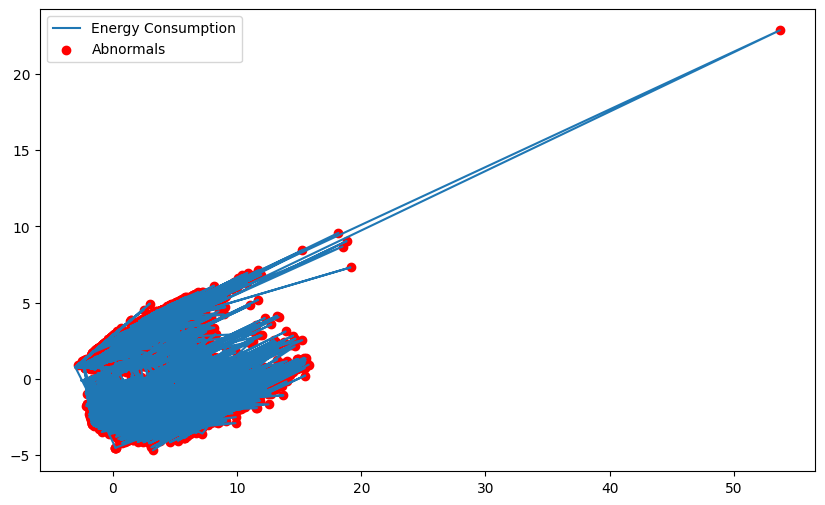

In [26]:
# Visualize the One-Class SVM anomalies in the PCA space
plt.figure(figsize=(10, 6))

# Plot the normal data points (all data)
plt.plot(df_pca[:, 0], df_pca[:, 1], label='Energy Consumption')

# Highlight anomalies in red (where abnormal_ocsvm is 1)
plt.scatter(df_pca[:, 0][df['abnormal_ocsvm'] == 1], 
            df_pca[:, 1][df['abnormal_ocsvm'] == 1], 
            color='red', label='Abnormals')

# Add legend and show the plot
plt.legend()
plt.show()


In [27]:
import pickle

# Saving modell
with open('C:\\Users\\norma\\OneDrive - Eotvos Lorand Tudomanyegyetem\\Asztal\\open\\model_ocsvm.pkl', 'wb') as f:
    pickle.dump(model_ocsvm, f)

# Saving pipeline
with open('C:\\Users\\norma\\OneDrive - Eotvos Lorand Tudomanyegyetem\\Asztal\\open\\pipeline_ocsvm.pkl', 'wb') as f:
    pickle.dump(pipeline_ocsvm, f)
